<a href="https://colab.research.google.com/github/marrs-lab/ocean_color/blob/main/mean_cosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is the mean cosine of a radiance distribution?

"The mean cosine of the radiance distribution:  The average cosine of the polar angle of all the radiance propagation direction; it equals the ratio of the net plane irradiance to the total scalar irradiance. The mean cosine is zero for an isotropic radiance distribution. Nondimensional." 

and 

"The mean cosine of the downward (upward) radiance:  The average cosine of the nadir (zenith) angle of all downward (upward) traveling photons; it equals the ratio of the plane irradiance to the scalar irradiance for the downward (upward) direction. The average cosines are AOPs. Nondimensional." 

via https://www.oceanopticsbook.info/view/references/brief-definitions.

In [7]:
import numpy as np
import math
from numpy import linalg, newaxis, random
from matplotlib import collections
import matplotlib.pyplot as plt

First let's generate 1000 of vectors randomly and uniformly selected going to a central point (0,0)

(-1.1, 1.1, -1.1, 1.2)

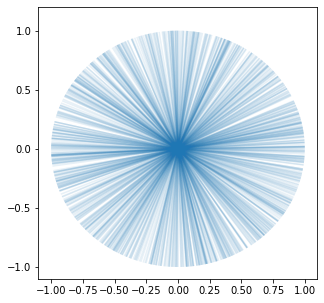

In [23]:
def gen_rand_vecs(dims, number):
    vecs = random.normal(size=(number,dims))
    mags = linalg.norm(vecs, axis=-1)

    return vecs / mags[..., newaxis]

ends = gen_rand_vecs(2, 1000)

# Add 0 vector to start
vectors = numpy.insert(ends[:, newaxis], 0, 0, axis=1)

mean_cos = np.mean(vectors[:,1,1])

axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)

figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(vectors, alpha=0.1))
axis.axis((-1.1, 1.1, -1.1, 1.2))
plt.show()

In [25]:
print('The mean cosine of this distribution is: ', mean_cos)

The mean cosine of this distribution is:  -0.017293723081137323


Let's only look at the downward vectors going to this point as a simulator of downward irradiance (Ed)

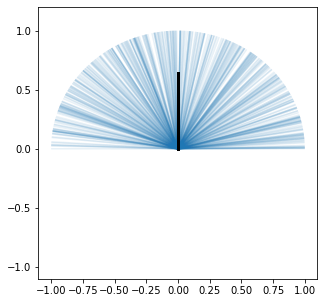

In [10]:
downward_vecs = vectors[vectors[:,1,1]>0]
# sort them so we can grab them with a probability distribution
downward_vecs_sort = downward_vecs[downward_vecs[:, 1,0].argsort()]

figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(downward_vecs_sort, alpha=0.1))
axis.axis((-1.1, 1.1, -1.1, 1.2))

mean_cos = np.mean(downward_vecs_sort[:,1,1])

axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)
# axis.plot([0,0.6394233792175309],[0,np.arccos(0.6394233792175309)],color='black', linewidth=3)


length=1
endy = length * math.sin(np.arccos(mean_cos))
endx = length * math.cos(np.arccos(mean_cos))
# axis.plot([0, endx], [0, endy], color='red')

plt.show()

In [11]:
print('The mean cosine of this distribution is: ', mean_cos)

The mean cosine of this distribution is:  0.642225190574302


Now let's create some probability distributions so that we grab vectors based on some likelihood

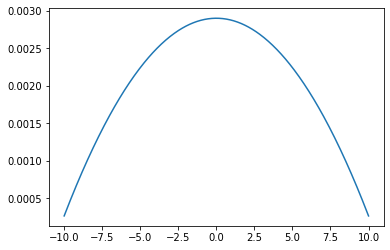

In [12]:
# create len(downward_vecs_sort) equally spaced points between -10 and 10
x = np.linspace(-10, 10, len(downward_vecs_sort))

# calculate the y value for each element of the x vector
y = -x**2/100 +1.1

prob_dist = y/y.sum()

fig, ax = plt.subplots()
ax.plot(x, prob_dist)

Grab 10,000 samples with replacement based on this distribution

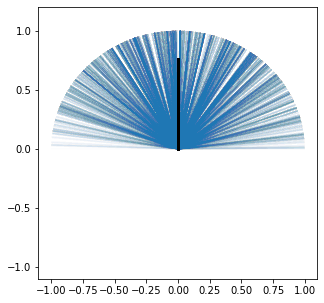

In [14]:
from numpy.random import choice
idxs = []
for i in range(10000):
  idxs.append(choice(np.arange(0,len(downward_vecs_sort),1), p=prob_dist))
  
figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(downward_vecs_sort[idxs],alpha=0.01))
axis.axis((-1.1, 1.1, -1.1, 1.2))

mean_cos = np.mean(downward_vecs_sort[idxs,1,1])
axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)
plt.show()

In [15]:
print('The mean cosine of this distribution is: ', mean_cos)

The mean cosine of this distribution is:  0.7631270413620155


### Make a more realistic distribution

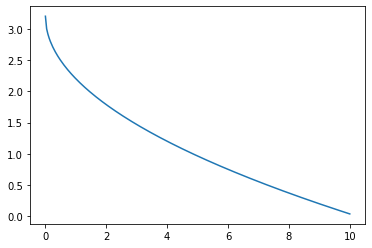

In [16]:
# create len(downward_vecs_sort)/2 equally spaced points between -10 and 10
x = np.linspace(0, 10, int(len(downward_vecs_sort)/2))

# calculate the y value for each element of the x vector
y = -x**(0.5)+3.2

fig, ax = plt.subplots()
ax.plot(x, y)

Flip it and stack it so that we have a strongly peaks distribution

In [17]:
peaked_dist = np.hstack((np.flip(y),y))
peaked_prob_dist = peaked_dist/peaked_dist.sum()

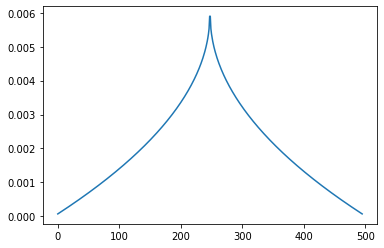

In [18]:
plt.plot(peaked_prob_dist)

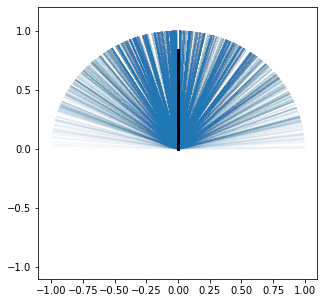

In [19]:
idxs = []
for i in range(10000):
  idxs.append(choice(np.arange(0,len(downward_vecs_sort),1), p=peaked_prob_dist))
  
figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(downward_vecs_sort[idxs],alpha=0.01))
axis.axis((-1.1, 1.1, -1.1, 1.2))

mean_cos = np.mean(downward_vecs_sort[idxs,1,1])
axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)

plt.show()

In [20]:
print('The mean cosine of this distribution is: ', mean_cos)

The mean cosine of this distribution is:  0.8371315058290042


Then some more extreme examples where we just subset the vector set:

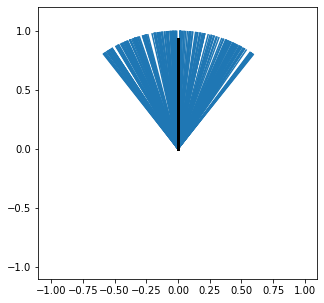

The mean cosine of this distribution is:  0.9301975751900252


In [21]:
figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(vectors[vectors[:,1,1]>.8]))
axis.axis((-1.1, 1.1, -1.1, 1.2))

mean_cos = np.mean(vectors[vectors[:,1,1]>.8][:,1,1])

axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)

plt.show()

print('The mean cosine of this distribution is: ', mean_cos)

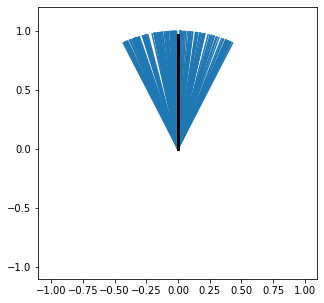

The mean cosine of this distribution is:  0.9652323140211748


In [22]:

figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(vectors[vectors[:,1,1]>.9]))
axis.axis((-1.1, 1.1, -1.1, 1.2))

mean_cos = np.mean(vectors[vectors[:,1,1]>.9][:,1,1])

axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)

plt.show()

print('The mean cosine of this distribution is: ', mean_cos)